<a href="https://colab.research.google.com/github/ClaudiaTurner/Predictive_Analytics/blob/main/Assignment_1_P_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
Individuals=pd.read_csv('https://github.com/ClaudiaTurner/Predictive_Analytics/raw/main/DATA/individuals.csv')
Age_Sex=pd.read_csv('https://github.com/ClaudiaTurner/Predictive_Analytics/raw/main/DATA/age_sex.csv')
Individuals.head()

Age_Sex.nlargest(5, 'Fa0_02')

,zone_name,zone_id,Fa0_02,Fa03_04,Fa05_09,Fa10_15,Fa16_19,Fa20_44,Fa45_64,Fa65_74,Fa75_pl,Ma0_02,Ma03_04,Ma05_09,Ma10_15,Ma16_19,Ma20_44,Ma45_64,Ma65_74,Ma75_pl
32399,Sheffield 075G,E01033268,157,5,19,26,128,415,148,72,70,13,6,162,24,151,648,198,77,54
32798,Colchester 015G,E01033723,146,85,144,101,46,717,85,14,6,169,76,164,88,43,648,82,11,5
1689,Hackney 029B,E01001728,144,74,108,80,63,419,129,34,26,127,58,102,84,45,355,125,23,19
16635,Portsmouth 018E,E01017132,138,80,73,55,153,560,158,57,101,78,58,115,79,181,550,159,43,51
14211,Bristol 055B,E01014653,128,56,108,94,63,496,177,50,28,129,73,134,128,83,538,209,56,46


In [5]:
Individuals.shape

(15533, 19)

In [3]:
# From the individual level dataset (‘individuals.csv’), how many individuals consume more than 5 grams of beef and 10 grams of sausages per day?


# Filter: individuals who consume more than 5g of beef AND more than 10g of sausages
filtered = Individuals[(Individuals['Beef'] > 5) & (Individuals['Sausages'] > 10)]

# Count how many meet the criteria
num_individuals = filtered.shape[0]

# Output the result
print(f"✅ Number of individuals consuming >5g of beef and >10g of sausages per day: {num_individuals}")


✅ Number of individuals consuming >5g of beef and >10g of sausages per day: 2997


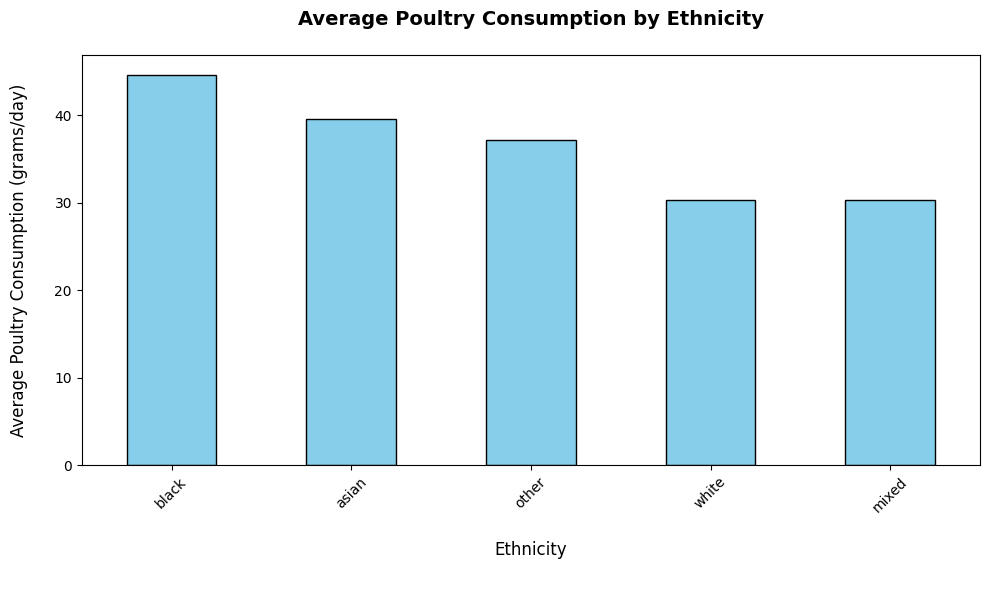

In [8]:
# Q1.3 Poultry consumption
# 8 Points
# Grading comment:
# Using the individual level dataset (‘individuals.csv’), create a bar chart showing average poultry consumption for each ethnicity category. Export as a JPEG image and upload.

# 2. Group by 'ethnicity' and calculate the mean poultry consumption
ethnicity_poultry = Individuals.groupby('Ethnicity')['Poultry'].mean().sort_values(ascending=False)

# 3. Plot the bar chart
plt.figure(figsize=(10, 6))
ethnicity_poultry.plot(kind='bar', color='skyblue', edgecolor='black')

# 4. Add labels and title
plt.title("Average Poultry Consumption by Ethnicity\n", fontsize=14, fontweight='bold')
plt.xlabel("\nEthnicity\n", fontsize=12)
plt.ylabel("Average Poultry Consumption (grams/day)\n", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# 5. Save as JPEG
plt.savefig("poultry_by_ethnicity.jpg", format='jpeg', dpi=300)

# 6. Show plot (optional, for review)

plt.savefig('Average_Poultry.png')

plt.show()

In [23]:
Age_Sex.columns

Index(['zone_name', 'zone_id', 'Fa0_02', 'Fa03_04', 'Fa05_09', 'Fa10_15',
       'Fa16_19', 'Fa20_44', 'Fa45_64', 'Fa65_74', 'Fa75_pl', 'Ma0_02',
       'Ma03_04', 'Ma05_09', 'Ma10_15', 'Ma16_19', 'Ma20_44', 'Ma45_64',
       'Ma65_74', 'Ma75_pl'],
      dtype='object')

In [ ]:
# Find zone with most female and male 0–2 year-olds combined
Age_Sex['Total_0_2'] = Age_Sex['Fa0_02'] + Age_Sex['Ma0_02']
highest_babies_zone = Age_Sex.sort_values('Total_0_2', ascending=False).head(1)
print(highest_babies_zone[['zone_name', 'zone_id', 'Total_0_2']])

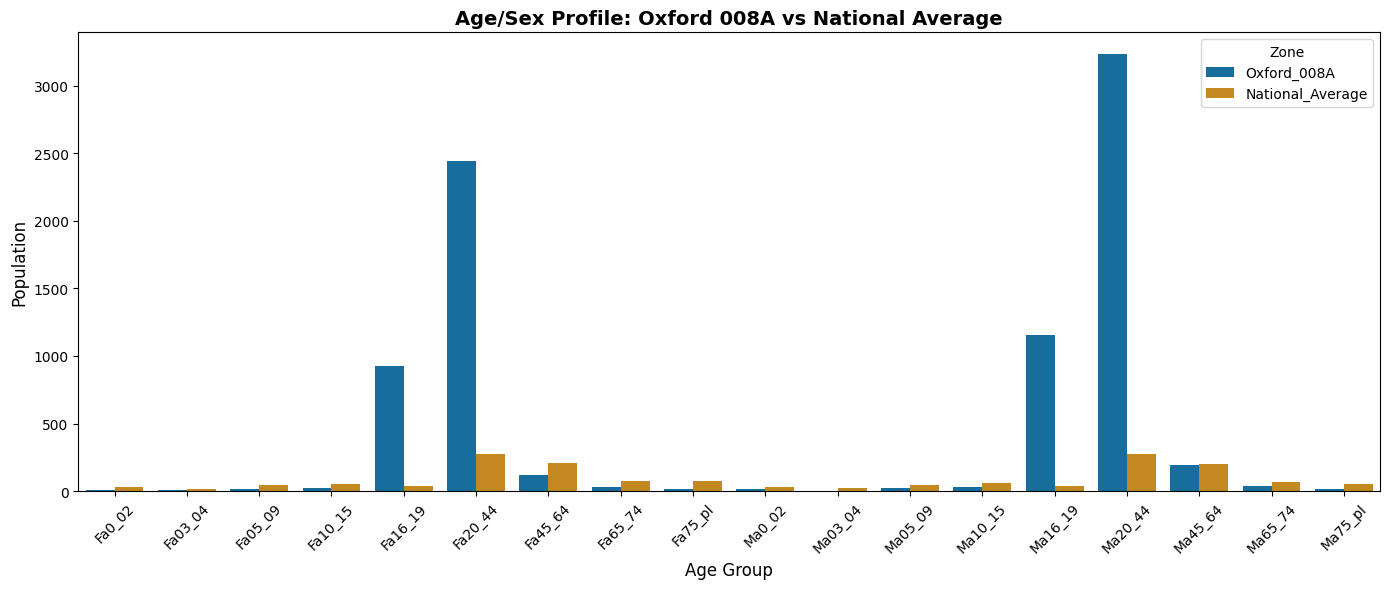

In [34]:
# Q1.4 Age profile chart
# 15 Points
# Grading comment:
# Use the 'age_sex.csv' file for this question.

# For a geographical zone of your choice, create a bar chart to show how the age/sex profile compares to the population as a whole.

# a) State the code of the geographical zone you chose

import seaborn as sns


# 2. Filter Oxford 008A (specific zone)
oxford = Age_Sex[Age_Sex['zone_id'] == 'E01033723']

# 3. Calculate national average (across all zones)
national_avg = Age_Sex.drop(columns=['zone_name', 'zone_id']).mean().to_frame(name='National_Average').T

# 4. Reshape Oxford and national data from wide to long
oxford_long = oxford.drop(columns=['zone_name', 'zone_id']).melt(var_name='Age_Sex', value_name='Colchester_015G')
national_long = national_avg.melt(var_name='Age_Sex', value_name='National_Average')

# 5. Merge both long DataFrames for comparison
combined = pd.merge(oxford_long, national_long, on='Age_Sex')

# 6. Plotting
plt.figure(figsize=(14, 6))
sns.barplot(data=combined.melt(id_vars='Age_Sex', var_name='Zone', value_name='Population'),
            x='Age_Sex', y='Population', hue='Zone', palette='colorblind')

# 7. Customizations
plt.title("Age/Sex Profile: Colchester 015G	 vs National Average", fontsize=14, fontweight='bold')
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()